In [14]:
import pandas as pd  #pandoas를 pd로 축약하여
import numpy as np
import matplotlib.pyplot as plt
#배열 시각화 라이브러리를 불러옴

data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
data.head()
# head() 함수는 엑셀의 최상위 행 5개 반환

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
data.info()
# info() 데이터의 결측값이 있는지, 타입이 무엇이 있는지 확인
#total_bedrooms이 비어있다 -> 결측값이 존재. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
data['ocean_proximity'].value_counts()
# 해당하는 컬럼의 값이 몇개 있는지 판단하는 함수 = value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
data.describe()
# describe() -> 데이터의 통계적 측면을 이용하는 함수

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


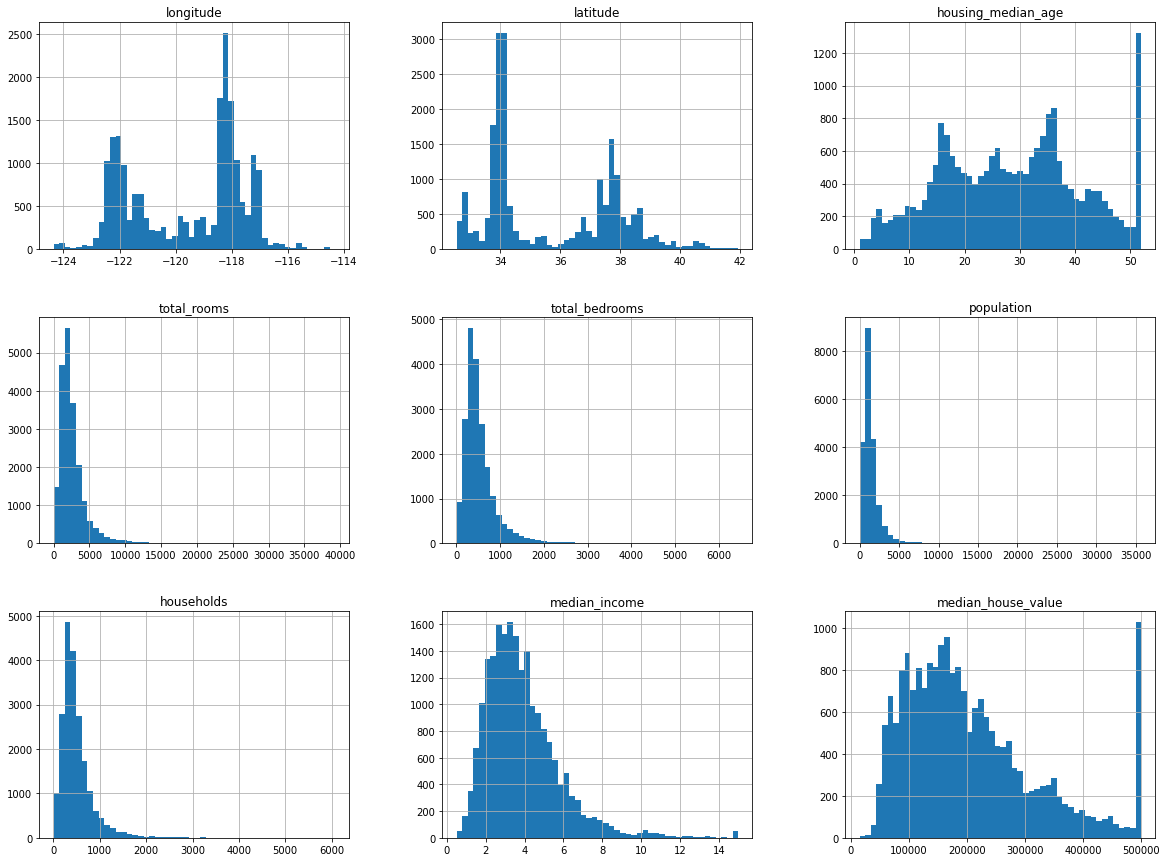

In [19]:
data.hist(bins=50, figsize=(20,15))
plt.show()
# data.hist() 데이터들을 컬럼별로 히스토그램화 한다. bins 빈도수를 50으로 설정. 20,15크기로 컬럼별로 히스토그램화 해줌
# Pit.show() 데이터 시각화를 보여주는 함수, 파이참에서 자주 사용

In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)
#

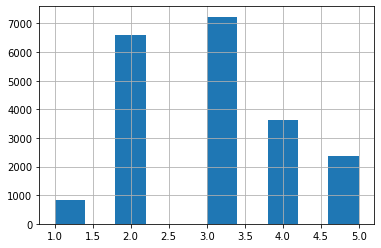

In [56]:
data['income_cat'] = pd.cut(data['median_income'], bins=[0.,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5])
data['income_cat'].hist()

In [57]:
del data['income_cat']

In [25]:
housing = train_set.copy()

In [26]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


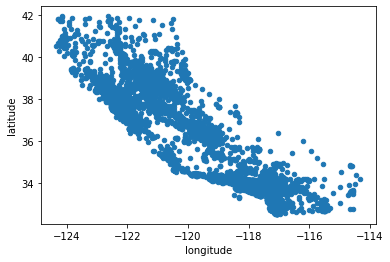

In [27]:
housing.plot(kind = 'scatter', x = 'longitude', y= 'latitude')

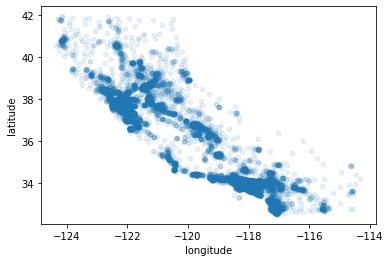

In [28]:
housing.plot(kind = 'scatter', x = 'longitude', y= 'latitude', alpha = 0.1)

In [31]:
housing.plot(kind='scatter', x='longitude', alpha=0.4,
             s = housing['population']/100, label = 'population', figsize=(10,7),
             c='median_house_value' , cmap=pit.get_cmap('jet'), colorbar = True)

NameError: ignored

In [32]:
corr = housing.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [34]:
corr['median_house_value'].sort_values()

latitude             -0.142983
longitude            -0.046349
population           -0.026032
total_bedrooms        0.047980
households            0.063714
housing_median_age    0.103706
total_rooms           0.133989
median_income         0.690647
median_house_value    1.000000
Name: median_house_value, dtype: float64

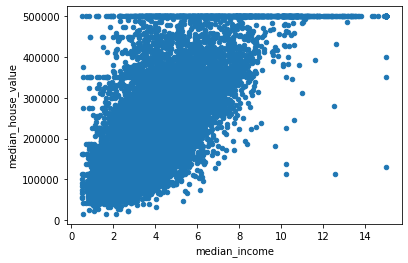

In [35]:
housing.plot(kind='scatter', x='median_income', y='median_house_value')

In [36]:
housing_labels = train_set['median_house_value'].copy() #답
housing = train_set.drop('median_house_value',axis=1) #문제

In [37]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [38]:
housing_labels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [41]:
a = housing[['ocean_proximity']]
a.head()

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND


In [43]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
b = encoder.fit_transform(a)
b[:10]

#ordinal - 순서대로 input
# one hot -> 입력받은 값을 인덱스로 매칭해 input

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [44]:
housing['ocean_proximity'] = b

In [45]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1.0
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,0.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,0.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,0.0


In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
some_data = housing[:5]
some_labels = housing_labels.iloc[:5]
print('답 :', some_labels, '예측: ', lin_reg.predict(some_data))

답 : 14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64 예측:  [180251.26434735 285591.79669634 262660.32133104 139991.5125668
 177370.82963546]


In [52]:
from sklearn.metrics import mean_squared_error

pred = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69361.07142906448

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
some_data = housing[:5]
some_labels = housing_labels.iloc[:5]
print('답 :', some_labels, '예측: ', forest_reg.predict(some_data))

답 : 14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64 예측:  [110105.   362335.01 192847.    89834.   108882.02]


In [55]:
pred = forest_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

18406.409188564186